In [1]:
import pandas as pd
import seaborn as sns

In [53]:
worldData = pd.read_csv("assets/world-data-2023.csv")
humanData = pd.read_csv("assets/human-data.csv")

merge = pd.merge(worldData, humanData, on=["Country", "Country"])

merge.loc[merge["Age"] == "18 years or over", "Age"] = "Adult"
merge.loc[merge["Age"] == "0 to 17 years", "Age"] = "Child"
merge.loc[merge["txtVALUE"] == "<5", "txtVALUE"] = "3"

data = merge[(merge["Dimension"] == "Total") & (merge["Indicator"] == "Detected trafficking victims")]

data['txtVALUE'] = data['txtVALUE'].str.replace(',', '').astype(float)
data['Population'] = data['Population'].str.replace(',', '').astype(float)
data['Minimum wage'] = data['Minimum wage'].str.replace('$', '').astype(float)
data['Out of pocket health expenditure'] = data['Out of pocket health expenditure'].str.replace('%', '').astype(float)
data['Unemployment rate'] = data['Unemployment rate'].str.replace('%', '').astype(float)
data['Life expectancy'] = data['Life expectancy'].str.astype(float)

data.to_csv("assets/filtered_data.csv")

C:\Users\tobia\AppData\Local\Temp\ipykernel_29604\503272099.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['txtVALUE'] = data['txtVALUE'].str.replace(',', '').astype(float)
C:\Users\tobia\AppData\Local\Temp\ipykernel_29604\503272099.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Population'] = data['Population'].str.replace(',', '').astype(float)
C:\Users\tobia\AppData\Local\Temp\ipykernel_29604\503272099.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

AttributeError: Can only use .str accessor with string values!

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

<Axes: xlabel='Year', ylabel='txtVALUE'>

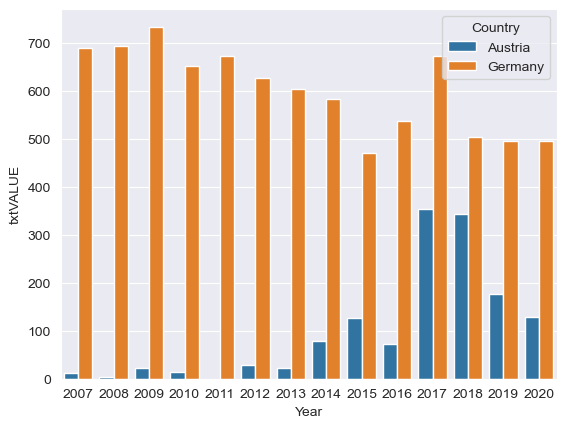

In [26]:
filtered = data[
    ((data["Country"] == "Austria") | (data["Country"] == "Germany")) & (
            (data["Age"] == "Total") & (data["Sex"] == "Total"))]
sns.barplot(data=filtered, y="txtVALUE", x="Year", hue="Country", errorbar=None)

C:\Users\tobia\AppData\Local\Temp\ipykernel_29604\2480699185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['value'] = filtered['txtVALUE'] / filtered['Population']
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\sit

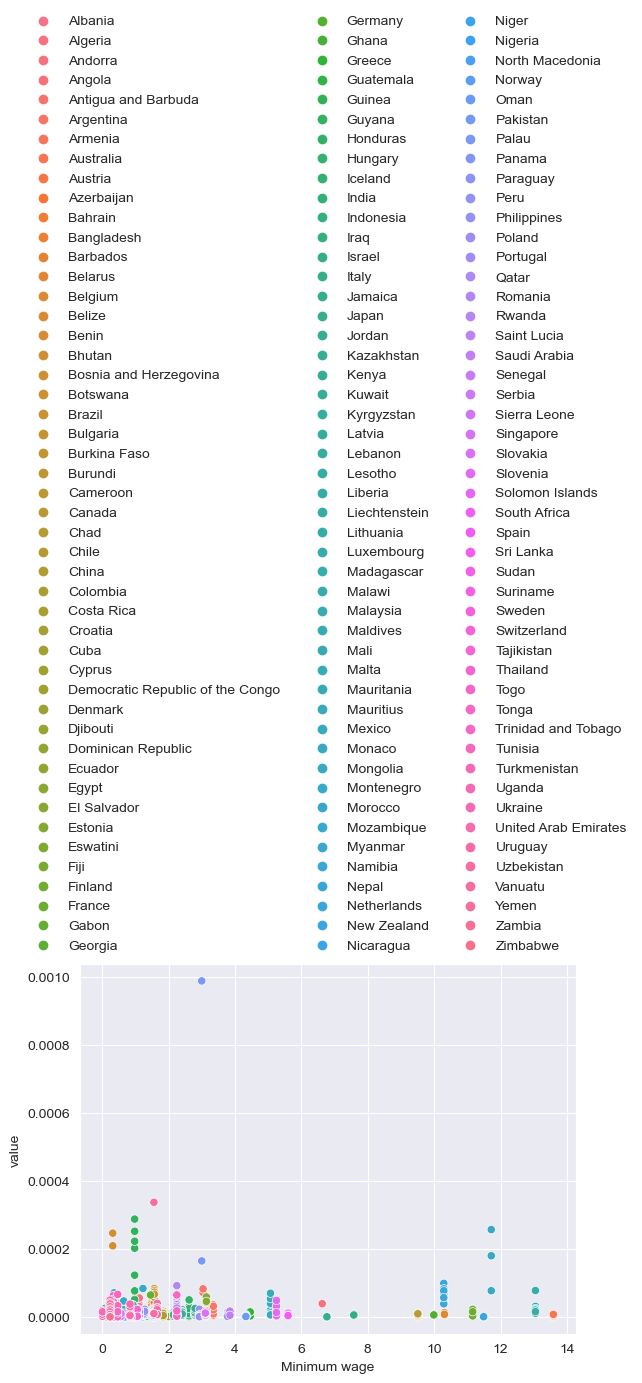

In [45]:
filtered = data[(data["Age"] == "Total") & (data["Sex"] == "Total")]
filtered['value'] = filtered['txtVALUE'] / filtered['Population']

ax = sns.scatterplot(data=filtered, y="value", x="Minimum wage", hue="Country")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

C:\Users\tobia\AppData\Local\Temp\ipykernel_29604\239469246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['value'] = filtered['txtVALUE'] / filtered['Population']
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site

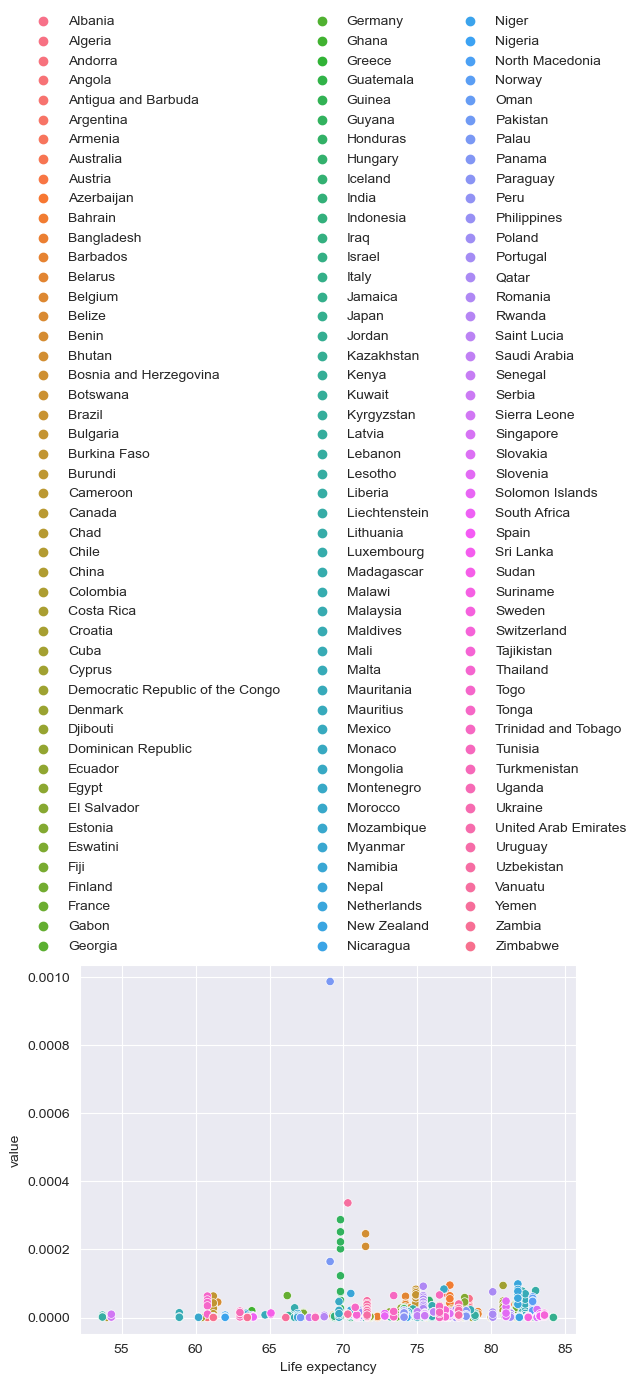

In [55]:
filtered = data[(data["Age"] == "Total") & (data["Sex"] == "Total")]
filtered['value'] = filtered['txtVALUE'] / filtered['Population']

ax = sns.scatterplot(data=filtered, y="value", x="Life expectancy", hue="Country")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)